# Rosa de Viento


In [ ]:
# Dar acceso a los archivos de Drive:
from google.colab import drive
drive.mount("/gdrive")

Mounted at /gdrive


In [ ]:
# Se instala y llama la librería windrose
!pip install windrose


# Instalar las librerías que no se encuentran en el sistema
!pip install wrf-python # instalar wrf-python
!pip install pyproj==1.9.6
!apt-get -qq install libgeos-dev
!pip install basemap # Instalar matplotlib
!pip install netCDF4

In [ ]:
# Llarmar las librerías para ser usadas en el código
from netCDF4 import Dataset
import numpy
import wrf
import pandas 
from mpl_toolkits import basemap
import matplotlib.pyplot

from windrose import WindroseAxes

# Rosa de Viento de los Archivos de Salida del Modelo NetCDF en la Ubicación de la Estación Asignada

In [ ]:
# Abrir el archivo que vamos a usar para graficar.
datos = Dataset("/gdrive/My Drive/Colab Notebooks/Taller_WRF/data/datos_taller_wrf_FIRE.nc") # Escenario FIRE
#datos = Dataset("/gdrive/My Drive/Colab Notebooks/Taller_WRF/data/datos_taller_wrf_NOFIRE.nc") # Escenario NOFIRE

In [ ]:
# Llamar el archivo de excel y la hoja donde están los datos de ubicación de las estaciones de monitoreo
Estaciones = pandas.read_excel('/gdrive/My Drive/Colab Notebooks/Taller_WRF/data/EstacionesBogota.xlsx', sheet_name='Ubic_Estaciones', index_col=False, header=0)
UBI_ESTACIONES = Estaciones.set_index('ESTACIONES')
print(UBI_ESTACIONES)

            NUMERO   LATITUD   LONGITUD  XLAT_d03  XLONG_d03
ESTACIONES                                                  
Carvajal        CV  4.595616 -74.148583      49.0       48.0
CentAltoRen     CA  4.658467 -74.083966      52.0       51.0
Guaymaral       GU  4.783756 -74.044183      56.0       52.0
Kennedy         KE  4.621667 -74.161333      50.0       48.0
LasFerias       LF  4.690700 -74.082483      53.0       51.0
PuentAranda     PA  4.631767 -74.117483      51.0       50.0
SanCrist        SC  4.572553 -74.083813      48.0       51.0
Suba            SU  4.761247 -74.093461      55.0       50.0
Tunal           TU  4.576225 -74.130955      49.0       49.0
Usaquen         US  4.710350 -74.030417      54.0       53.0
Movil7ma        M7  4.645361 -74.061679      51.0       52.0
Fontibon        FO  4.670121 -74.141361      52.0       49.0
MinAmb          MA  4.625385 -74.067185      50.0       51.0


In [ ]:
#******************************
# Modifique el nombre de la estación tal cual esta en la tabla de excel anterior dentro de las comillas.
nombre_estacion = "Tunal"
#*****************************

cel_lat = int(UBI_ESTACIONES.loc[nombre_estacion]['XLAT_d03'])
cel_lon = int(UBI_ESTACIONES.loc[nombre_estacion]['XLONG_d03'])

print(cel_lat, cel_lon)

49 49


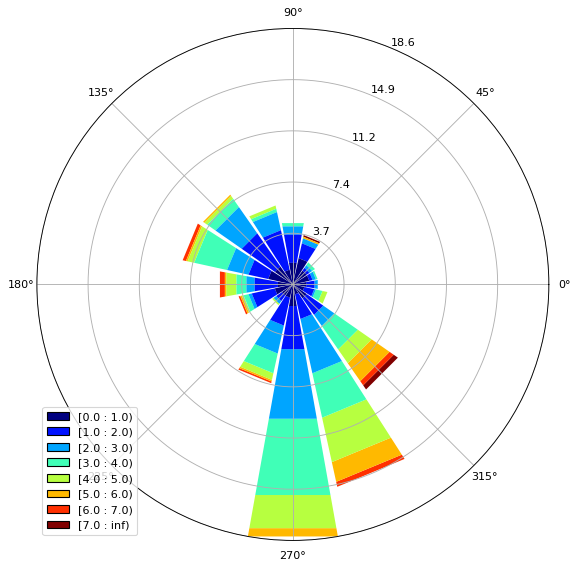

In [ ]:
# Para la rosa de vientos necesitamos los datos de dirección y velocidad.
WIND = (wrf.g_uvmet.get_uvmet_wspd_wdir(datos, wrf.ALL_TIMES, squeeze=True, cache=None, meta=True,_key=None, units='m s-1'))

# Velocidad del viento en m/s
WS = WIND[0,:,cel_lat,cel_lon]

# Dirección del viento en grados.
WD = WIND[1,:,cel_lat,cel_lon]

ax = WindroseAxes.from_ax()
ax.bar(WD, WS, normed=True, opening=0.9, edgecolor='None', bins=numpy.arange(0, 8, 1))
ax.legend()

matplotlib.pyplot.savefig("/gdrive/My Drive/Colab Notebooks/Taller_WRF/Imagenes/RosaViento_FIRE.png", dpi=100, bbox_inches='tight', transparent=True)

# Rosa de Viento de las Observaciones de la Estación de Monitoreo Asignada

Para esto usaremos el Excel

In [ ]:
# Nombre de las hojas del excel con los datos de las estaciones
xl = pandas.ExcelFile('/gdrive/My Drive/Colab Notebooks/Taller_WRF/data/EstacionesBogota.xlsx')
xl.sheet_names

['Ubic_Estaciones',
 'Carvajal',
 'CentAltoRen',
 'LasFerias',
 'Fontibon',
 'Guaymaral',
 'Kennedy',
 'MinAmb',
 'Movil7ma',
 'PuentAranda',
 'SanCrist',
 'Suba',
 'Tunal',
 'Usaquen']

In [ ]:
# Llamar el archivo de excel y la hoja donde están los datos de ubicación de las estaciones de monitoreo

#**********************************************
# Coloque el nombre de la hoja de Excel con la estación de monitoreo que le fue asiganda entre las comillas.
nombre_estacion = "Tunal"
#**********************************************

Mi_estacion = pandas.read_excel('/gdrive/My Drive/Colab Notebooks/Taller_WRF/data/EstacionesBogota.xlsx', sheet_name=nombre_estacion, index_col=False, header=0)
print(Mi_estacion)

                   date  PM10    O3   CO  ...   WD    T2  Precipitacion  PM25
0   2020-03-14 01:00:00  48.0   2.5  0.5  ...  241  14.4            0.0  30.0
1   2020-03-14 02:00:00  46.0   3.2  0.2  ...  106  14.0            1.0  25.0
2   2020-03-14 03:00:00  39.0   2.9  0.2  ...  118  13.8            0.2  25.0
3   2020-03-14 04:00:00  27.0   8.2  0.3  ...  127  14.0            0.0   7.0
4   2020-03-14 05:00:00  60.0   6.3  0.4  ...  116  14.2            0.0  28.0
..                  ...   ...   ...  ...  ...  ...   ...            ...   ...
787 2020-04-15 20:00:00  42.0  26.2  0.4  ...  288  15.5            0.0  27.0
788 2020-04-15 21:00:00  43.0  22.5  0.4  ...  286  14.8            0.0  20.0
789 2020-04-15 22:00:00  54.0  16.2  0.7  ...  242  15.2            0.0  30.0
790 2020-04-15 23:00:00  76.0   9.4  0.8  ...  145  14.8            0.0  31.0
791 2020-04-16 00:00:00  90.0   4.0  0.8  ...  131  13.8            0.0  37.0

[792 rows x 13 columns]


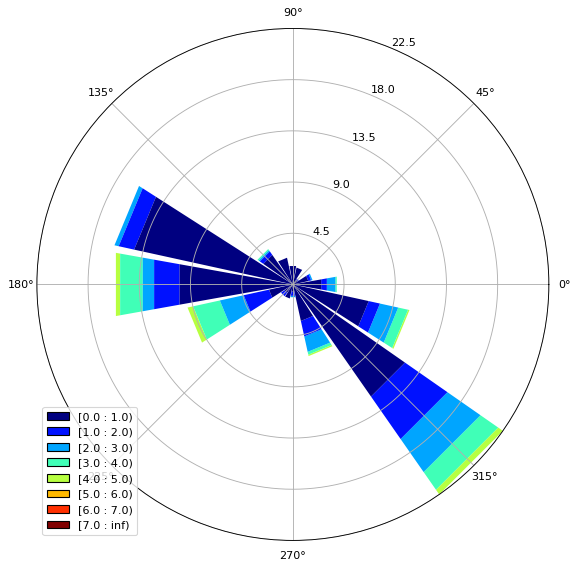

In [ ]:
# Graficar la Rosa de Viento de la Estación Asignada

ax = WindroseAxes.from_ax()
ax.bar(Mi_estacion.WD, Mi_estacion.WS, normed=True, opening=0.9, edgecolor='None', bins=numpy.arange(0, 8, 1))
ax.legend()

matplotlib.pyplot.savefig("/gdrive/My Drive/Colab Notebooks/Taller_WRF/Imagenes/RosaViento_MiEstacion.png", dpi=100, bbox_inches='tight', transparent=True)